# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

We start with a generative model:

$$
X \sim U(10,20)
$$

$$
Y \sim mX + b + N(0,\sigma^2)
$$

Here are the input parameters we are going to use for this model.

In [3]:
m = 0.75
b = 3.5
sigma = 0.5

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `X` and `Y`:

In [4]:
# YOUR CODE HERE
X = np.random.uniform(10,20,50)
norm = np.random.normal(0,sigma**2,50)
Y = np.array([m * X[i] + b + norm[i] for i in range(50)])

Make an appropriately labeled scatter plot of the `X` and `Y` data:

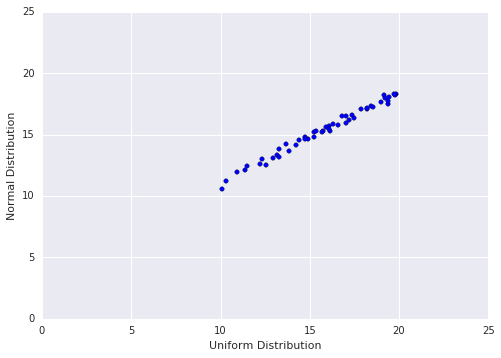

In [5]:
# YOUR CODE HERE
plt.scatter(X,Y)
plt.axis([0, 25, 0, 25])
plt.xlabel('Uniform Distribution')
plt.ylabel('Normal Distribution')

In [6]:
from scipy.optimize import curve_fit

Write a function `fit`, that uses `curve_fit` and returns a fitted `(slope, intercept)` for the `X` and `Y` data above.

In [7]:
def func(x,m,b):
    return m*x + b
def fit(X, Y):
    """Fit X and Y data to the model Y ~ m*X + b and return (m,b)"""
    # YOUR CODE HERE
    fit = curve_fit(func, X, Y)
    return (fit[0][0], fit[0][1])

In [8]:
m, b = fit([0,1,2], [0,1,2])
assert abs(m-1.0)<0.01
assert abs(b-0.0)<0.01

Write a function, `bootstrap`, that can create boostrapped versions of the `X` and `Y` arrays above. It is important that you bootstrap pairs of `X[i],Y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [9]:
def bootstrap(X, Y):
    """Return boostrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    X: ndarray
        Input X array.
    Y: ndarray
    
    Returns
    -------
    XX: ndarray
        The boostrapped X array with the same shape as X and correlated random samples
        drawn with replacement.
    YY: ndarray
        The bootstrapped Y array with the same shape as Y and correlated random samples
        drawn with replacement.
    """
    # YOUR CODE HERE
    rand_ndx = np.random.random_integers(0, len(X) - 1, len(X))
    x = np.array([X[i] for i in rand_ndx])
    y = np.array([Y[j] for j in rand_ndx])
    return (x,y)

In [10]:
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [21]:
def bootstrap_fit(X, Y, n):
    """Fit a straight line to X and Y n times using bootstrapping.
    
    Returns
    -------
    (m, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the slope and intercept.
    """
    # YOUR CODE HERE
    result = []
    for i in range(n):
        tempx, tempy = bootstrap(X,Y)
        result.append(fit(tempx, tempy))
    data = list(zip(*result))
    return (data[0], data[1])

Using the original `X` and `Y` data above:

* Find the bootstrapped slopes and intercepts (bootstrap 100 times).
* Make an appropriately labeled `jointplot` of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

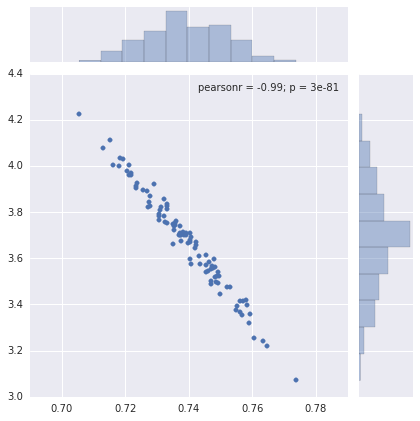

In [28]:
# YOUR CODE HERE
s,i = bootstrap_fit(X,Y,100)
a = sns.jointplot(np.array(list(s)),np.array(list(i)))

In [29]:
s = np.sort(s)
i = np.sort(i)
print("")